In [1]:
using Pkg
Pkg.add("PyPlot")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


# 須山先生の実装を参考。

In [2]:
using PyPlot, LinearAlgebra

In [3]:
# 学習用データ
X_t = range(-5, 5, length=10)
Y_t = sin.(2pi*X_t./10 + 0.1*randn(10))

10-element Array{Float64,1}:
 -0.08923240486092432 
 -0.6692640075683175  
 -0.9707909119894838  
 -0.849160206038904   
 -0.3745506858014191  
  0.43784004027398427 
  0.9120450340171548  
  0.9880647409514312  
  0.6633126588942531  
  0.061920045430809006

In [4]:
# 検証用データ
X_p = range(-8, 8, length=100)

-8.0:0.16161616161616163:8.0

In [5]:
# カーネル関数の定義1(RBFカーネル)
a, b, c = (1.0, 1.0, 0.1)
k(x1, x2) = a*exp(-0.5*inv(b*b)*(x1 - x2)*(x1 - x2)) + c*(x1==x2)
# k(x1, x2) = a*exp(-0.5*inv(b*b)*(x1 - x2)*(x1 - x2)) 

k (generic function with 1 method)

In [6]:
# 学習用データにてカーネルの逆行列を計算
invK_tt = inv(k.(X_t, X_t'))

10×10 Array{Float64,2}:
  1.26639      -0.78285      0.351981    …   0.00104674  -0.000316737
 -0.78285       1.75032     -1.00044        -0.00345645   0.00104674 
  0.351981     -1.00044      1.84815         0.00955063  -0.00289741 
 -0.142161      0.439861    -1.03995        -0.0256001    0.00779508 
  0.0549222    -0.176111     0.455119        0.0677721   -0.0207951  
 -0.0207951     0.0677721   -0.181873    …  -0.176111     0.0549222  
  0.00779508   -0.0256001    0.0698932       0.439861    -0.142161   
 -0.00289741    0.00955063  -0.0262879      -1.00044      0.351981   
  0.00104674   -0.00345645   0.00955063      1.75032     -0.78285    
 -0.000316737   0.00104674  -0.00289741     -0.78285      1.26639    

In [7]:
# 検証用データと学習用データのカーネルを計算
K_pp, K_pt = (k.(X_p, X_p'), k.(X_p, X_t'))

([1.1 0.9870250184978526 … 3.370222644109602e-55 2.572209372642415e-56; 0.9870250184978526 1.1 … 4.301968144492054e-54 3.370222644109602e-55; … ; 3.370222644109602e-55 4.301968144492054e-54 … 1.1 0.9870250184978526; 2.572209372642415e-56 3.370222644109602e-55 … 0.9870250184978526 1.1], [0.011108996538242306 0.00021376841881809205 … 2.0285035964894713e-31 2.005008781961654e-37; 0.017806149443382536 0.0004100402722691176 … 1.3676445860198718e-30 1.61771321600697e-36; … ; 1.61771321600697e-36 1.3676445860198718e-30 … 0.0004100402722691176 0.017806149443382536; 2.005008781961654e-37 2.0285035964894713e-31 … 0.00021376841881809205 0.011108996538242306])

In [8]:
# 予測値とその分散を計算
mu_p, sigma_p = (K_pt * invK_tt * Y_t, K_pp - K_pt * invK_tt * K_pt')

([0.0017438462918557053, 0.0027661380083786775, 0.004265078658468397, 0.006389111194105758, 0.00929230645878171, 0.01310992049857396, 0.017921521348166512, 0.02370189678932751, 0.03026283853906113, 0.03719249147265649  …  -0.04596745345287202, -0.037055071832131525, -0.028818329717212744, -0.021672835763986806, -0.015787386519945688, -0.011152858879740383, -0.00764798476389353, -0.005094513628134778, -0.0032983373776615124, -0.0020764176564381], [1.0998473449466426 0.9867808920025098 … 5.43431500431647e-8 3.4346778394620956e-8; 0.9867808920025098 1.0996095862531154 … 8.598120972398604e-8 5.43431500431647e-8; … ; 5.434315004316464e-8 8.598120972398592e-8 … 1.0996095862531154 0.9867808920025098; 3.434677839462091e-8 5.434315004316464e-8 … 0.9867808920025098 1.0998473449466426])

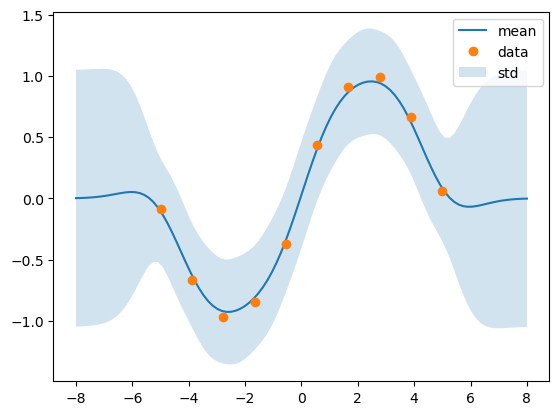

PyObject <matplotlib.legend.Legend object at 0x130e3ef90>

In [9]:
# 表示
plot(X_p, mu_p, label="mean")
fill_between(X_p, mu_p+sqrt.(diag(sigma_p)), mu_p-sqrt.(diag(sigma_p)), label="std", alpha=0.2)
plot(X_t, Y_t, "o", label="data")
legend()

ガウス過程は、ノンパラメトリック。

モデルの自由度は上がるが、計算量が多くなる。（今までのデータを蓄積しておく必要あり。計算方法の効率改善に関して多数の研究がある。）

$$ p(y_p | x_p, x_t) = N(K_{pt}K_{tt}^{-1}y_t, K_{pp}-K_{pt}K_{tt}^{-1}K_{pt}^{T})$$

$$　\mu = K_{pt}K_{tt}^{-1}y_t$$

$$　\sigma = K_{pp}-K_{pt}K_{tt}^{-1}K_{pt}^{T}$$

In [10]:
# 学習用データと検証用データの類似度？
K_pt

100×10 Array{Float64,2}:
 0.011109     0.000213768  1.19687e-6   …  2.0285e-31   2.00501e-37
 0.0178061    0.00041004   2.74737e-6      1.36764e-30  1.61771e-36
 0.0278049    0.000766242  6.1439e-6       8.98312e-30  1.27158e-35
 0.0422989    0.00139496   1.33853e-5      5.74827e-29  9.73736e-35
 0.0626893    0.00247408   2.84097e-5      3.58347e-28  7.26432e-34
 0.0905136    0.00427486   5.8744e-5    …  2.17634e-27  5.27966e-33
 0.127318     0.00719592   0.000118336     1.28767e-26  3.73829e-32
 0.174471     0.0118007    0.000232233     7.42234e-26  2.57867e-31
 0.232924     0.0188532    0.000444006     4.16805e-25  1.73291e-30
 0.302942     0.0293439    0.00082701      2.28024e-24  1.13452e-29
 0.38385      0.0444946    0.00150068   …  1.2153e-23   7.23608e-29
 0.473827     0.0657285    0.00265291      6.31024e-23  4.49626e-28
 0.569816     0.0945924    0.00456891      3.192e-22    2.7218e-27 
 ⋮                                      ⋱                          
 4.49626e-28  6.31024e-

In [11]:
invK_tt

10×10 Array{Float64,2}:
  1.26639      -0.78285      0.351981    …   0.00104674  -0.000316737
 -0.78285       1.75032     -1.00044        -0.00345645   0.00104674 
  0.351981     -1.00044      1.84815         0.00955063  -0.00289741 
 -0.142161      0.439861    -1.03995        -0.0256001    0.00779508 
  0.0549222    -0.176111     0.455119        0.0677721   -0.0207951  
 -0.0207951     0.0677721   -0.181873    …  -0.176111     0.0549222  
  0.00779508   -0.0256001    0.0698932       0.439861    -0.142161   
 -0.00289741    0.00955063  -0.0262879      -1.00044      0.351981   
  0.00104674   -0.00345645   0.00955063      1.75032     -0.78285    
 -0.000316737   0.00104674  -0.00289741     -0.78285      1.26639    

In [12]:
Y_t

10-element Array{Float64,1}:
 -0.08923240486092432 
 -0.6692640075683175  
 -0.9707909119894838  
 -0.849160206038904   
 -0.3745506858014191  
  0.43784004027398427 
  0.9120450340171548  
  0.9880647409514312  
  0.6633126588942531  
  0.061920045430809006

In [13]:
K_pp

100×100 Array{Float64,2}:
 1.1          0.987025     0.949101     …  3.37022e-55  2.57221e-56
 0.987025     1.1          0.987025        4.30197e-54  3.37022e-55
 0.949101     0.987025     1.1             5.34973e-53  4.30197e-54
 0.889106     0.949101     0.987025        6.48117e-52  5.34973e-53
 0.811429     0.889106     0.949101        7.64946e-51  6.48117e-52
 0.721446     0.811429     0.889106     …  8.79559e-50  7.64946e-51
 0.624905     0.721446     0.811429        9.85269e-49  8.79559e-50
 0.527327     0.624905     0.721446        1.07523e-47  9.85269e-49
 0.433513     0.527327     0.624905        1.14315e-46  1.07523e-47
 0.347201     0.433513     0.527327        1.18403e-45  1.14315e-46
 0.270904     0.347201     0.433513     …  1.19476e-44  1.18403e-45
 0.205924     0.270904     0.347201        1.17449e-43  1.19476e-44
 0.152495     0.205924     0.270904        1.12481e-42  1.17449e-43
 ⋮                                      ⋱                          
 1.19476e-44  1.17449e